In [1]:
import os
os.chdir('/Users/federicogalbiati/Documents/GitHub/User-Study-Game-Performance-Analysis-ISU/')

In [5]:
import pandas as pd
from glob import glob

df = pd.DataFrame(columns=['game_name', 'CPU Core', 'GPU Core'])

for log in glob('data/processed/hw-study/G6/*.csv'):
    if 'metrics_' in log: continue
    game_name = os.path.basename(log).split('-')[0]
    data = pd.read_csv(log)
    data = data[['CPU Total', 'GPU Total']]
    data['game_name'] = game_name
    df = pd.concat([data, df])

df = df.groupby(['game_name']).mean()

print(df)

               CPU Total  GPU Total
game_name                          
Apex           70.970603  22.889831
AssassinCreed  51.080921  13.232068
CSGO           44.892986  24.094340
CivVI          31.358179  17.962675
Fortnite       55.919289  13.688119
GTA5           32.402620  18.019527
Hearthstone    15.899284  16.924742
LoL            32.097515  15.536585
Minecraft      92.417683  12.875899
Overwatch      58.972307  66.155378
PUBG           64.856912  30.599278
R6             44.838355  14.021346


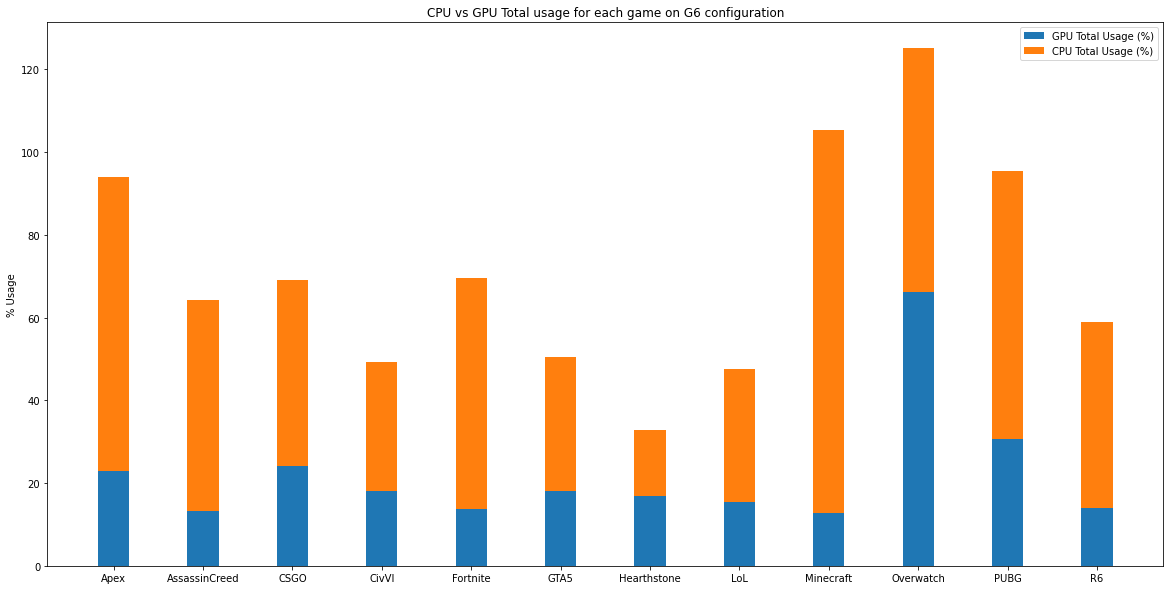

In [8]:
import matplotlib.pyplot as plt

gpu, cpu = df['GPU Total'].values, df['CPU Total'].values
labels = df.index
width = 0.35

plt.figure(figsize=(20, 10))

plt.bar(labels, gpu, width, label='GPU Total Usage (%)') # yerr=[],
plt.bar(labels, cpu, width, label='CPU Total Usage (%)', bottom=gpu) # yerr=[],

plt.title('CPU vs GPU Total usage for each game on G6 configuration')

plt.ylabel('% Usage')
plt.legend()

plt.show()